In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC


In [2]:
data = pd.read_csv('final_with_covid_AS.csv')
data.head()

,CountCases,BedDys,BeddystoCC,Severity,DiedCases,DiedBdDys,Hsptlsns,April,August,December,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,CovidPrd
0,17,133,7.823529,75,4,9,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13,372,28.615385,63,4,34,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,106,13.250000,48,4,13,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,218,4.844444,153,3,24,42,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,238,9.916667,90,3,8,21,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
filtered_data = data[data['CarDriver'] == 1]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12582 entries, 11 to 54025
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12582 non-null  int64  
 1   BedDys           12582 non-null  int64  
 2   BeddystoCC       12582 non-null  float64
 3   Severity         12582 non-null  int64  
 4   DiedCases        12582 non-null  int64  
 5   DiedBdDys        12582 non-null  int64  
 6   Hsptlsns         12582 non-null  int64  
 7   April            12582 non-null  int64  
 8   August           12582 non-null  int64  
 9   December         12582 non-null  int64  
 10  February         12582 non-null  int64  
 11  January          12582 non-null  int64  
 12  July             12582 non-null  int64  
 13  June             12582 non-null  int64  
 14  March            12582 non-null  int64  
 15  May              12582 non-null  int64  
 16  November         12582 non-null  int64  
 17  October         

In [4]:
num_bins = 2

bed_days_min = filtered_data['Severity'].min()
bed_days_max = filtered_data['Severity'].max()

bin_width = (bed_days_max - bed_days_min) / num_bins
bins = [bed_days_min + i * bin_width for i in range(num_bins + 1)]

def bin_function(x):
    for i in range(1, len(bins)):
        if x <= bins[i]:
            return i - 1
    return i

filtered_data['Bed_days_category'] = filtered_data['Severity'].apply(bin_function)

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_1737/4218815035.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Bed_days_category'] = filtered_data['Severity'].apply(bin_function)


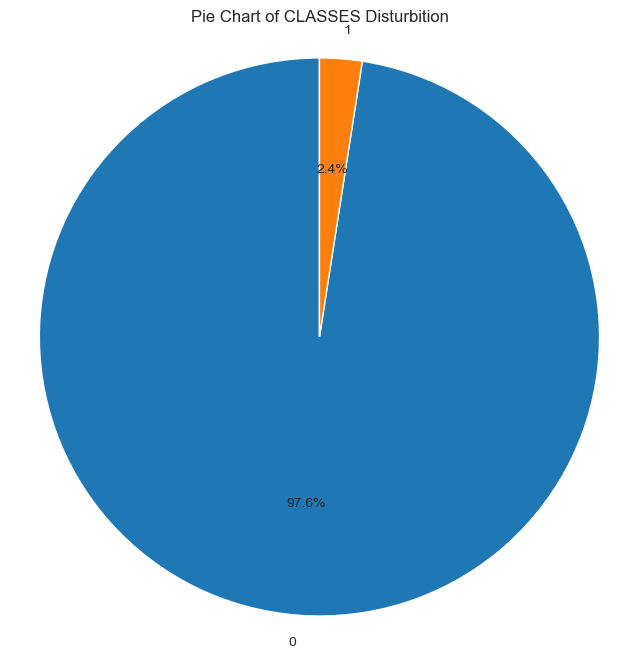

In [5]:
import matplotlib.pyplot as plt

value_counts = filtered_data['Bed_days_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Pie Chart of CLASSES Disturbition')
plt.show()

In [7]:
from xgboost import XGBClassifier

X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   
                   'Male','Female',
                   
                   'Regional','MajorCities',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data['Bed_days_category']


LEARN SIMPLE

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_pred_xgb = xgb_model.predict(X_test)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1221    7]
 [   6   25]]
Confusion Matrix for Fold 2:
 [[1217   11]
 [   9   22]]
Confusion Matrix for Fold 3:
 [[1225    2]
 [  10   21]]
Confusion Matrix for Fold 4:
 [[1222    5]
 [   4   27]]
Confusion Matrix for Fold 5:
 [[1220    7]
 [   4   27]]
Confusion Matrix for Fold 6:
 [[1219    8]
 [   5   26]]
Confusion Matrix for Fold 7:
 [[1225    2]
 [   8   23]]
Confusion Matrix for Fold 8:
 [[1220    7]
 [  10   21]]
Confusion Matrix for Fold 9:
 [[1224    4]
 [   7   23]]
Confusion Matrix for Fold 10:
 [[1219    9]
 [   6   24]]
Mean Accuracy: 0.9895887290364701
Accuracy Std Dev: 0.0025472344290426263
Mean Precision: 0.8012658253463879
Precision Std Dev: 0.07678825116672497
Mean Recall: 0.7760215053763441
Recall Std Dev: 0.06968214838591537
Mean F1-score: 0.7849055943313302
F1-score Std Dev: 0.04985136908306482
Mean Confusion Matrix:
 [[1221.2    6.2]
 [   6.9   23.9]]


LEARN NEW VASVAS

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from xgboost import XGBClassifier

# تعداد فولدها
n_splits = 10

# داده‌ها به مجموعه‌های آموزشی و اعتبارسنجی تقسیم می‌شوند
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Initializing StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store best thresholds for each fold
best_thresholds = []

# Define function to evaluate thresholds and return best one
def evaluate_thresholds(y_true, y_pred_probs, thresholds):
    best_threshold = 0.5
    best_f1 = 0
    for threshold in thresholds:
        y_pred = (y_pred_probs[:, 1] >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold, best_f1

# Define function for grid search to optimize threshold
def grid_search_threshold(y_true, y_pred_probs):
    thresholds = np.arange(0.1, 0.9, 0.01)
    best_threshold, _ = evaluate_thresholds(y_true, y_pred_probs, thresholds)
    return best_threshold

# Loop through each fold
for train_index, val_index in skf.split(X_train_val, y_train_val):
    X_train_fold, X_val_fold = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train_fold, y_val_fold = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train_fold, y_train_fold)
    
    # Predict probabilities for the validation set
    y_val_probs = xgb_model.predict_proba(X_val_fold)
    
    # Grid search to find the best threshold
    best_threshold = grid_search_threshold(y_val_fold, y_val_probs)
    best_thresholds.append(best_threshold)

# Calculate the mean threshold
mean_threshold = np.mean(best_thresholds)

print('Mean Best Threshold:', mean_threshold)

# Use the mean threshold to predict and evaluate on the test set
y_test_probs = xgb_model.predict_proba(X_test)
y_test_pred = (y_test_probs[:, 1] >= mean_threshold).astype(int)

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print('Final Model Evaluation on Test Data:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:\n', conf_matrix)


Mean Best Threshold: 0.41099999999999987
Final Model Evaluation on Test Data:
Accuracy: 0.9912629070691025
Precision: 0.7741935483870968
Recall: 0.8571428571428571
F1-score: 0.8135593220338982
Confusion Matrix:
 [[1224    7]
 [   4   24]]


In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import GridSearchCV

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Define a function to calculate metrics for different thresholds
def evaluate_thresholds(y_true, y_pred_probs, thresholds):
    best_threshold = 0.5
    best_f1 = 0
    for threshold in thresholds:
        y_pred = (y_pred_probs[:, 1] >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold, best_f1

# List to store best thresholds for each fold
best_thresholds = []

# Define a function for grid search to optimize threshold
def grid_search_threshold(y_true, y_pred_probs):
    thresholds = np.arange(0.1, 0.9, 0.01)
    best_threshold, best_f1 = evaluate_thresholds(y_true, y_pred_probs, thresholds)
    return best_threshold

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_pred_probs = xgb_model.predict_proba(X_test)
    
    # Grid search to find the best threshold
    best_threshold = grid_search_threshold(y_test, y_pred_probs)
    best_thresholds.append(best_threshold)
    
    y_pred_xgb = (y_pred_probs[:, 1] >= best_threshold).astype(int)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)} (Threshold {best_threshold}):\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)
print('Best Thresholds:', best_thresholds)


Confusion Matrix for Fold 1 (Threshold 0.7499999999999997):
 [[1226    2]
 [   8   23]]
Confusion Matrix for Fold 2 (Threshold 0.22999999999999995):
 [[1212   16]
 [   3   28]]
Confusion Matrix for Fold 3 (Threshold 0.13):
 [[1218    9]
 [   1   30]]
Confusion Matrix for Fold 4 (Threshold 0.5999999999999998):
 [[1225    2]
 [   4   27]]
Confusion Matrix for Fold 5 (Threshold 0.2799999999999999):
 [[1220    7]
 [   3   28]]
Confusion Matrix for Fold 6 (Threshold 0.5299999999999998):
 [[1220    7]
 [   5   26]]
Confusion Matrix for Fold 7 (Threshold 0.3199999999999999):
 [[1225    2]
 [   4   27]]
Confusion Matrix for Fold 8 (Threshold 0.12):
 [[1214   13]
 [   2   29]]
Confusion Matrix for Fold 9 (Threshold 0.5899999999999997):
 [[1227    1]
 [   9   21]]
Confusion Matrix for Fold 10 (Threshold 0.5299999999999998):
 [[1223    5]
 [   6   24]]
Mean Accuracy: 0.9913372841139978
Accuracy Std Dev: 0.002917123915699697
Mean Precision: 0.8248150010908631
Precision Std Dev: 0.10348599836982837

In [18]:
threshold = 0.4040404040404041

probabilities = xgb_model.predict_proba(X_test)

thresholded_predictions = (probabilities[:, 1] >= threshold).astype(int)

acc_thresholded = accuracy_score(y_test, thresholded_predictions)
conf_matrix_thresholded = confusion_matrix(y_test, thresholded_predictions)
class_report_thresholded = classification_report(y_test, thresholded_predictions)

precision_thresholded = precision_score(y_test, thresholded_predictions) 
recall_thresholded = recall_score(y_test, thresholded_predictions)
f1_thresholded = f1_score(y_test, thresholded_predictions)
print('Accuracy:', acc_thresholded)
print('Confusion Matrix:\n', conf_matrix_thresholded)
print('Classification Report:\n', class_report_thresholded)
print('Precision:', precision_thresholded)
print('Recall:', recall_thresholded)
print('F1-score:', f1_thresholded)


Accuracy: 0.9888712241653418
Confusion Matrix:
 [[1219    9]
 [   5   25]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1228
           1       0.74      0.83      0.78        30

    accuracy                           0.99      1258
   macro avg       0.87      0.91      0.89      1258
weighted avg       0.99      0.99      0.99      1258

Precision: 0.7352941176470589
Recall: 0.8333333333333334
F1-score: 0.78125
